# 🧩 Notebook 16: Multi-Panel Plot Layouts in Matplotlib

In [1]:
# 📦 Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import matplotlib.gridspec as gridspec

# ✅ Set up project root and utils
PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

from plot_utils import create_dashboard

In [2]:
# 📁 Load and preprocess data
df = pd.read_csv(PROJECT_ROOT / "datasets" / "sales_data.csv")
df["Month"] = pd.to_datetime(df["Month"])
monthly = df.groupby(df["Month"].dt.to_period("M")).agg({
    "Revenue": "sum",
    "Units Sold": "sum"
}).reset_index()
monthly["Month"] = monthly["Month"].dt.to_timestamp()

In [3]:
# 📁 Create output directory
export_dir = PROJECT_ROOT / "exports" / "dashboards"
export_dir.mkdir(parents=True, exist_ok=True)

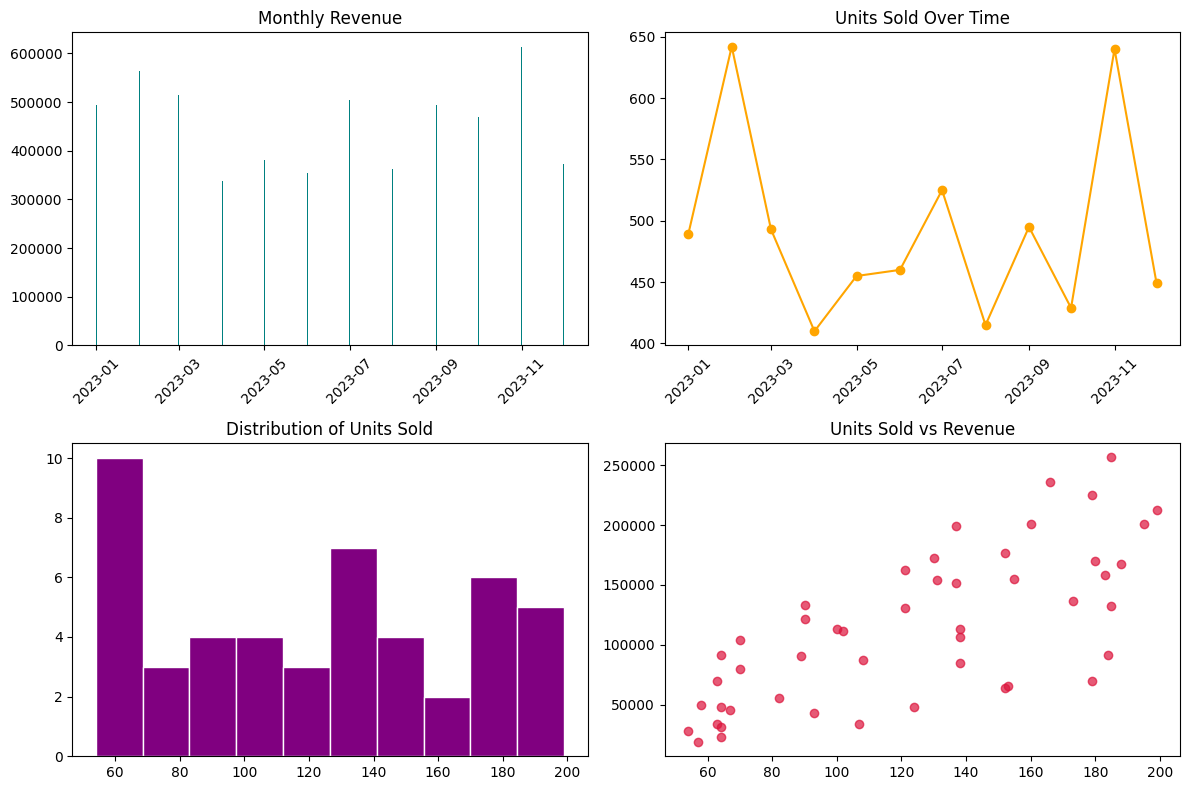

In [4]:
# 🧱 1. Simple 2x2 Dashboard Layout using subplots
fig1, axs = plt.subplots(2, 2, figsize=(12, 8))

# 📊 Top Left: Bar chart of revenue
axs[0, 0].bar(monthly["Month"], monthly["Revenue"], color="teal")
axs[0, 0].set_title("Monthly Revenue")
axs[0, 0].tick_params(axis='x', rotation=45)

# 📈 Top Right: Line plot of units sold
axs[0, 1].plot(monthly["Month"], monthly["Units Sold"], marker="o", color="orange")
axs[0, 1].set_title("Units Sold Over Time")
axs[0, 1].tick_params(axis='x', rotation=45)

# 📦 Bottom Left: Histogram of units sold
axs[1, 0].hist(df["Units Sold"], bins=10, color="purple", edgecolor="white")
axs[1, 0].set_title("Distribution of Units Sold")

# 🔍 Bottom Right: Scatter of units sold vs revenue
axs[1, 1].scatter(df["Units Sold"], df["Revenue"], color="crimson", alpha=0.7)
axs[1, 1].set_title("Units Sold vs Revenue")

plt.tight_layout()
fig1.savefig(export_dir / "sales_dashboard_subplots_2x2.png", dpi=300)
plt.show()

/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_63964/2079701113.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(
/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_63964/2079701113.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig2.savefig(export_dir / "sales_dashboard_gridspec.png", dpi=300)
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


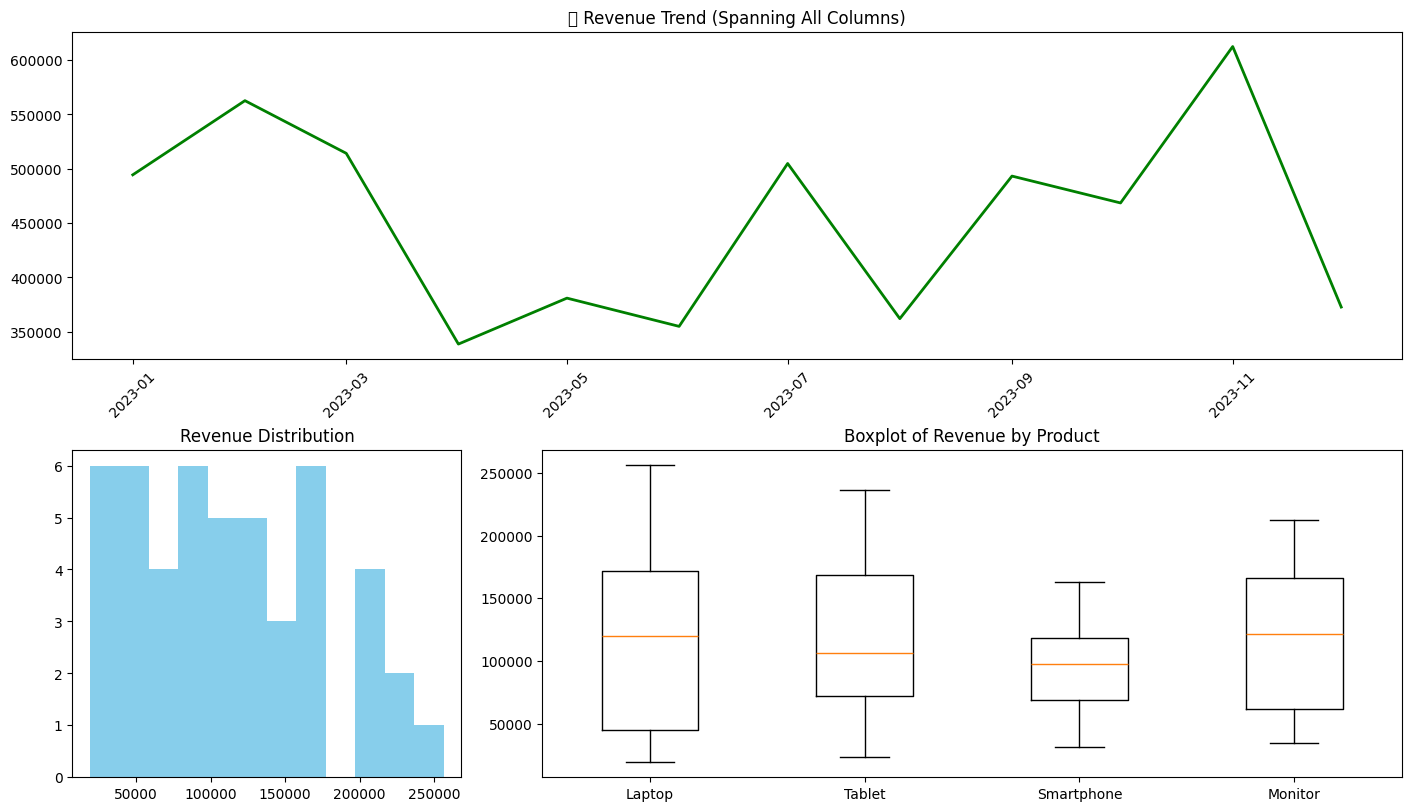

In [5]:
# 🧰 2. Custom Layout using GridSpec
fig2 = plt.figure(constrained_layout=True, figsize=(14, 8))
gs = gridspec.GridSpec(2, 3, figure=fig2)

# Wide top row: Revenue trend
ax1 = fig2.add_subplot(gs[0, :])
ax1.plot(monthly["Month"], monthly["Revenue"], color="green", linewidth=2)
ax1.set_title("📈 Revenue Trend (Spanning All Columns)")
ax1.tick_params(axis='x', rotation=45)

# Bottom left: Histogram of revenue
ax2 = fig2.add_subplot(gs[1, 0])
ax2.hist(df["Revenue"], bins=12, color="skyblue")
ax2.set_title("Revenue Distribution")

# Bottom right (spanning two cols): Boxplot by product
ax3 = fig2.add_subplot(gs[1, 1:])
ax3.boxplot(
    [df[df["Product"] == prod]["Revenue"].values for prod in df["Product"].unique()],
    labels=df["Product"].unique()
)
ax3.set_title("Boxplot of Revenue by Product")

fig2.savefig(export_dir / "sales_dashboard_gridspec.png", dpi=300)
plt.show()

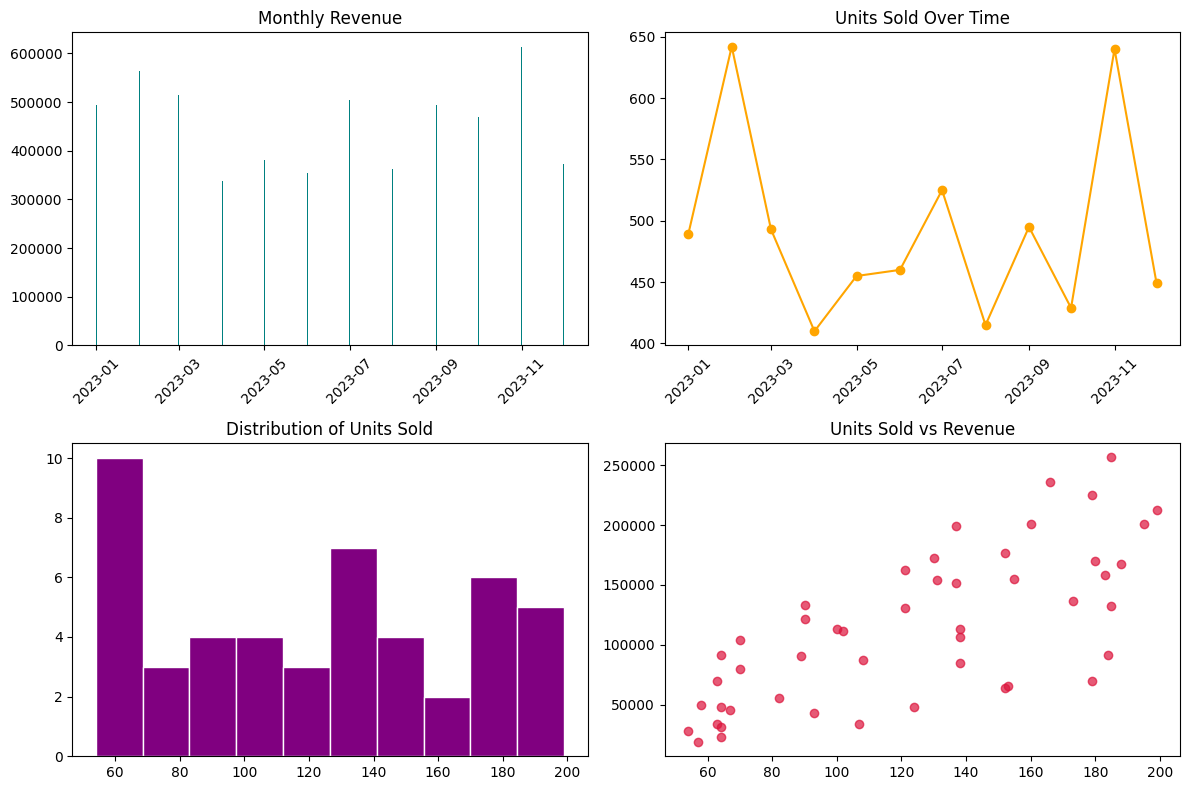

In [6]:
# 🛠️ 3. Create and export a dashboard via reusable function
create_dashboard(df, monthly, save_path=export_dir / "sales_dashboard_2x2.png")

# ✅ Summary
-------------------------
- Created 3 distinct multi-panel dashboards using subplots, GridSpec, and utility function
- Showed time-based trends, comparisons, and distributions across layout types
- Exported all dashboards to `exports/dashboards/` for sharing or reporting